<h2> Simulações: Capítulo 13

### 13.3 Sistemas de Dados Amostrados

**Exemplos e Análise**

Para analisar esses sistemas, consideramos os efeitos de diferentes períodos de amostragem $T$. Quando $T$ é pequeno, o sinal de saída $p(t)$ se aproxima do sinal de entrada $r(t)$. Por exemplo, para uma entrada de rampa $r(t) = t$, o sinal de saída seguirá a forma da rampa com pequenas descontinuidades. Para um sinal exponencialmente decrescente $r(t) = e^{-t}$, o sinal de saída mostrará uma aproximação ao decaimento exponencial, dependendo do período de amostragem.

**Simulação**

Vamos utilizar a biblioteca `control` do Python para gerar simulações dos sistemas de dados amostrados mencionados.

In [1]:
!pip install control numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.0 MB/s eta 0:00:00


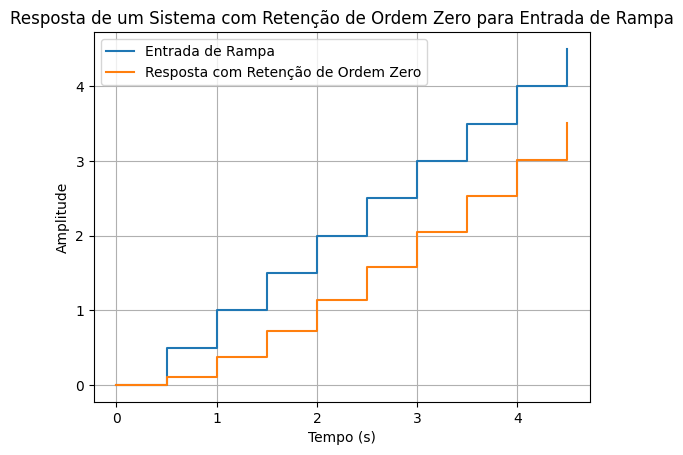

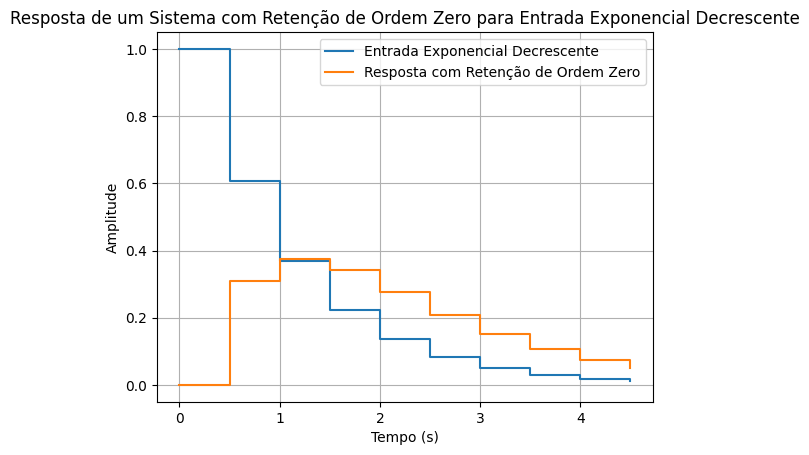

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir parâmetros da simulação
T = 0.5  # Período de amostragem
t = np.arange(0, 5, T)

# Entrada de rampa
ramp_input = t

# Função de transferência do sistema para retenção de ordem zero
G = ctrl.TransferFunction([1], [1, 1])
hold = ctrl.TransferFunction([1], [0, 1])

# Simulação da resposta com entrada de rampa
_, ramp_response = ctrl.forced_response(G*hold, t, ramp_input)

# Plotar a resposta ao degrau
plt.figure()
plt.step(t, ramp_input, where='post', label='Entrada de Rampa')
plt.step(t, ramp_response, where='post', label='Resposta com Retenção de Ordem Zero')
plt.title('Resposta de um Sistema com Retenção de Ordem Zero para Entrada de Rampa')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Entrada exponencial decrescente
exp_input = np.exp(-t)

# Simulação da resposta com entrada exponencial decrescente
_, exp_response = ctrl.forced_response(G*hold, t, exp_input)

# Plotar a resposta exponencial decrescente
plt.figure()
plt.step(t, exp_input, where='post', label='Entrada Exponencial Decrescente')
plt.step(t, exp_response, where='post', label='Resposta com Retenção de Ordem Zero')
plt.title('Resposta de um Sistema com Retenção de Ordem Zero para Entrada Exponencial Decrescente')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

### Transformada Z de Funções Exponenciais e Senoidais

Vamos determinar a transformada $z$ de uma função exponencial decrescente $e^{-at}$:

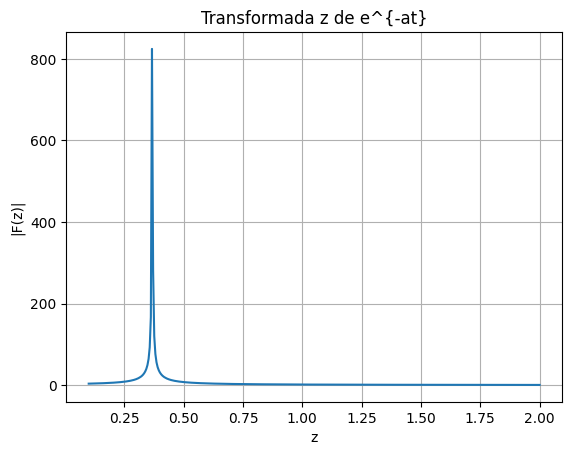

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parâmetros da função exponencial
a = 1
T = 1
z = np.linspace(0.1, 2, 400)

# Transformada z
F_z = 1 / (z - np.exp(-a * T))

# Plotar a transformada z
plt.figure()
plt.plot(z, np.abs(F_z))
plt.title('Transformada z de e^{-at}')
plt.xlabel('z')
plt.ylabel('|F(z)|')
plt.grid()
plt.show()

Transformada Z de uma Função Senoidal
Vamos determinar a transformada z de uma função seno
$\sin(\omega t)$:

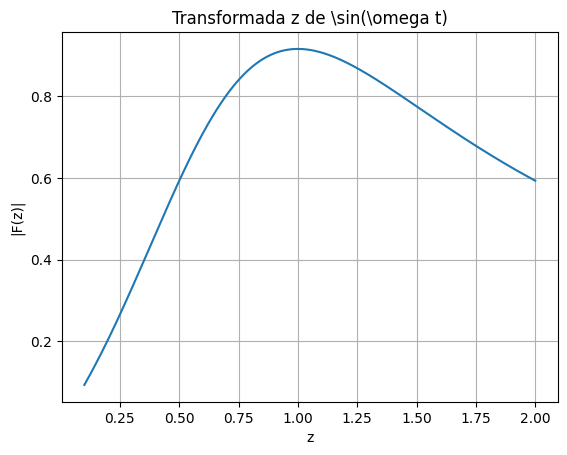

In [4]:
# Parâmetros da função seno
omega = 1

# Transformada z
F_z = (z * np.sin(omega * T)) / (z**2 - 2*z*np.cos(omega * T) + 1)

# Plotar a transformada z
plt.figure()
plt.plot(z, np.abs(F_z))
plt.title('Transformada z de \sin(\omega t)')
plt.xlabel('z')
plt.ylabel('|F(z)|')
plt.grid()
plt.show()


Análise do Sistema de Dados Amostrados
Vamos considerar um sistema de dados amostrados com uma função de transferência de retenção de ordem zero. A resposta do sistema a uma entrada de degrau unitário é obtida para 𝑅 (𝑧) = 1:

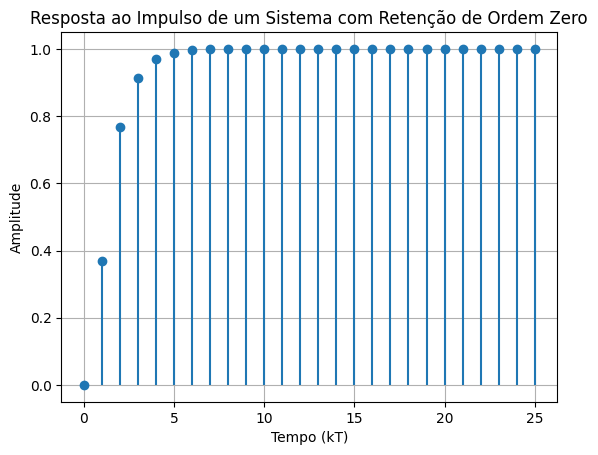

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência do sistema com retenção de ordem zero
G = ctrl.TransferFunction([0.3678, 0.2644], [1, -1.3678, 0.3678], 1)

# Simulação da resposta a um impulso unitário
T, yout = ctrl.impulse_response(G)

# Plotar a resposta ao impulso
plt.figure()
plt.stem(T, yout, basefmt=" ")
plt.title('Resposta ao Impulso de um Sistema com Retenção de Ordem Zero')
plt.xlabel('Tempo (kT)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


### 13.5 Sistemas de Dados Amostrados de Feedback em Malha Fechada

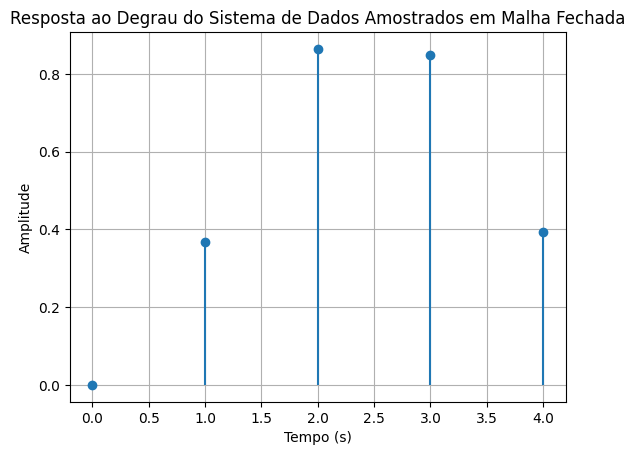

O sistema é estável? True


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência no domínio z para T = 1s
G_z = ctrl.TransferFunction([0.3678, 0.2644], [1, -1, 0.6322], 1)

# Função de transferência de malha fechada
T_z = ctrl.feedback(G_z, 1)

# Simulação da resposta ao degrau
T = np.arange(0, 5, 1)
step_input = np.ones_like(T)
_, step_response = ctrl.forced_response(T_z, T, step_input)

# Plotar a resposta ao degrau
plt.figure()
plt.stem(T, step_response, basefmt=" ")
plt.title('Resposta ao Degrau do Sistema de Dados Amostrados em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Análise de Estabilidade
poles = np.abs(ctrl.poles(T_z))
stable = all(poles < 1)
print("O sistema é estável?", stable)

### 13.8 O Lugar das Raízes de Sistemas de Controle Digital

/usr/local/lib/python3.11/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


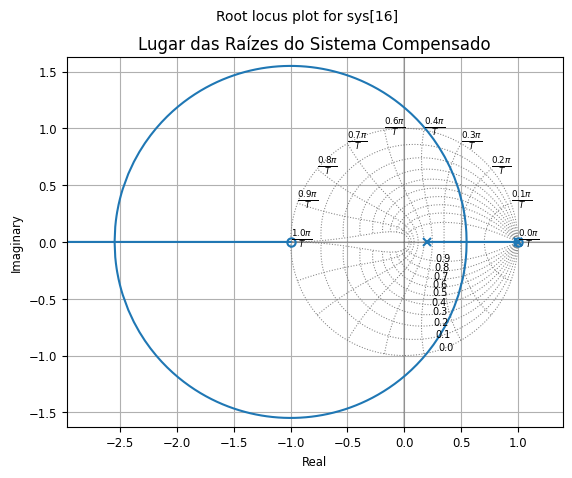

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir os parâmetros do sistema
T = 1  # Período de amostragem

# Função de transferência do sistema sem compensador
Gp = ctrl.TransferFunction([1], [1, 0, 0])
G_z = ctrl.sample_system(Gp, T, method='zoh')

# Definir o compensador digital D(z)
D_z = ctrl.TransferFunction([1, -1], [1, -0.2], T)

# Sistema compensado
G_compensated_z = D_z * G_z

# Plotar o lugar das raízes do sistema compensado
plt.figure()
rlocus = ctrl.root_locus(G_compensated_z, plot=True)
plt.title('Lugar das Raízes do Sistema Compensado')
plt.grid()
plt.show()

### 13.9 Implementação de Controladores Digitais

**Implementação de um Controlador PID Digital**

Podemos implementar a equação acima usando um computador digital ou microprocessador. Para um controlador PI ou PD, ajustamos os ganhos apropriados para zero.

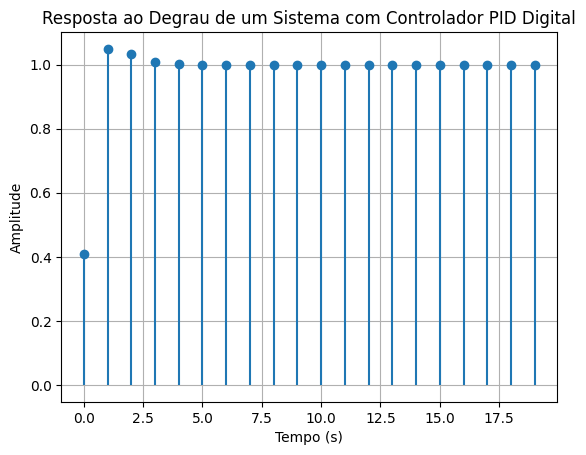

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parâmetros do controlador PID
Kp = 1.0
Ki = 0.5
Kd = 0.1
T = 1  # Período de amostragem

# Função de transferência do processo no domínio s
Gp = ctrl.TransferFunction([1], [1, 1])

# Converter para o domínio z usando o período de amostragem T
Gp_z = ctrl.sample_system(Gp, T, method='zoh')

# Controlador PID no domínio z
num_pid = [Kd/T + Kp, -(Kd/T) + Kp + Ki*T, -Ki*T]
den_pid = [1, -1]
PID_z = ctrl.TransferFunction(num_pid, den_pid, T)

# Sistema em malha fechada
T_z = ctrl.feedback(PID_z * Gp_z, 1)

# Simulação da resposta ao degrau
time = np.arange(0, 20, T)
step_input = np.ones_like(time)
time_out, step_response = ctrl.forced_response(T_z, time, step_input)

# Plotar a resposta ao degrau
plt.figure()
plt.stem(time_out, step_response, basefmt=" ")  # Removido o argumento 'use_line_collection'
plt.title('Resposta ao Degrau de um Sistema com Controlador PID Digital')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


### 13.10 Exemplos de Projeto

1. **Projeto Inicial do Controlador**:

Primeiramente, utilizamos um sistema contínuo e projetamos o controlador $ G_c(s) $ descrito anteriormente. Em seguida, obtemos $ D(z) $ a partir de $ G_c(s) $.



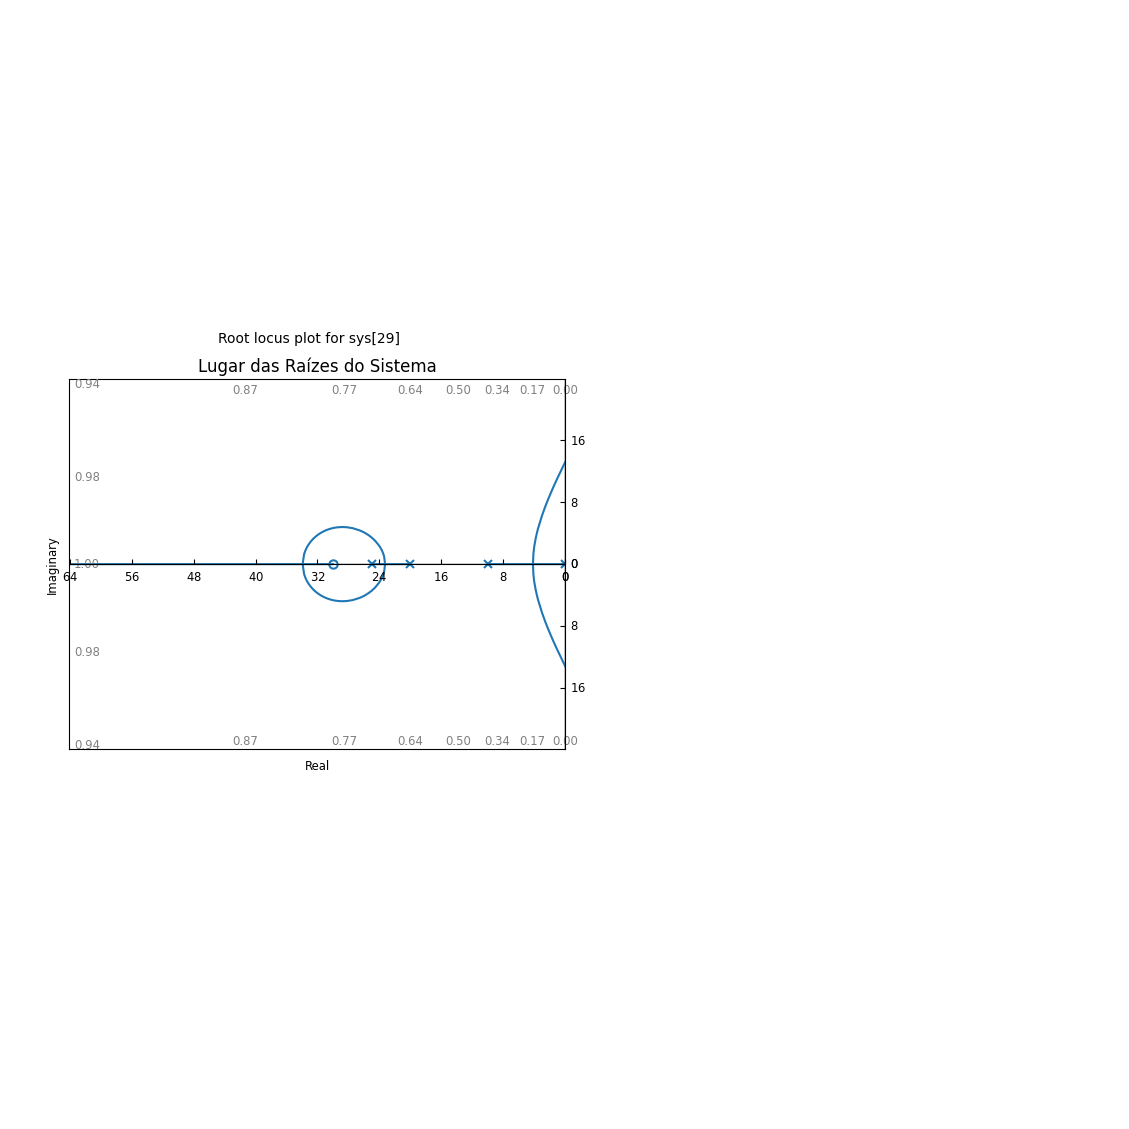

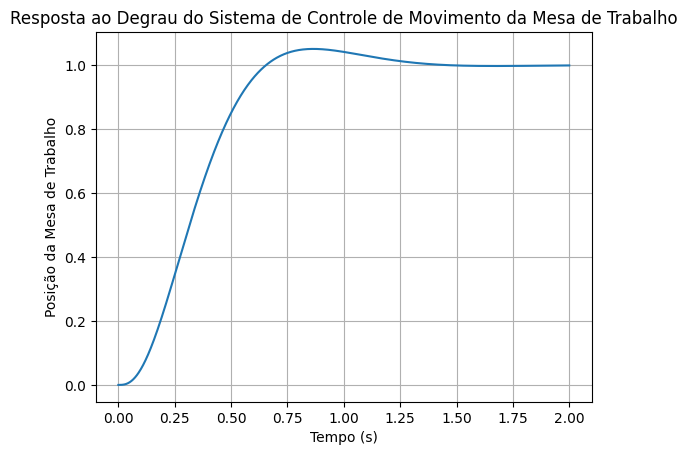

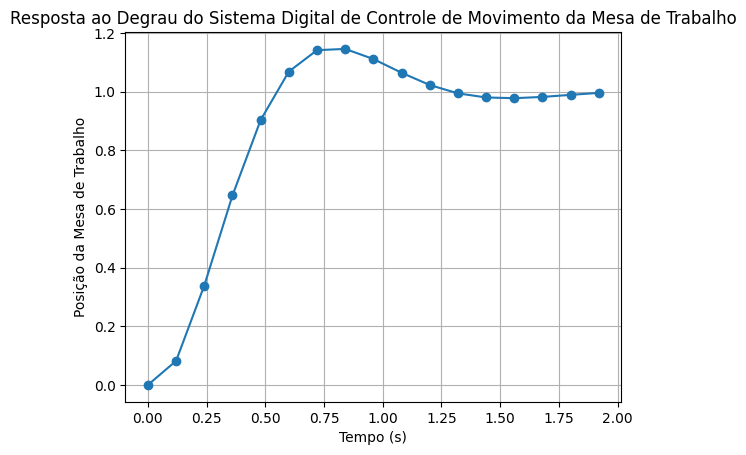

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência do processo
Gp = ctrl.TransferFunction([1], [1, 30, 200, 0])

# Controlador contínuo
a = 30
b = 25
K = 545
Gc = ctrl.TransferFunction([K, K*a], [1, b])

# Sistema em malha fechada
G_closed_loop = ctrl.feedback(Gc * Gp, 1)

# Plotar o lugar das raízes do sistema
plt.figure()
ctrl.root_locus(Gc * Gp)
plt.title('Lugar das Raízes do Sistema')
plt.grid()
plt.show()

# Simulação da resposta ao degrau no domínio contínuo
time_continuous = np.linspace(0, 2, 1000)
time_out, step_response = ctrl.step_response(G_closed_loop, time_continuous)

# Plotar a resposta ao degrau no domínio contínuo
plt.figure()
plt.plot(time_out, step_response)
plt.title('Resposta ao Degrau do Sistema de Controle de Movimento da Mesa de Trabalho')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição da Mesa de Trabalho')
plt.grid()
plt.show()

# Frequência de amostragem e parâmetros do controlador digital
T = 0.12  # Período de amostragem
A = np.exp(-a*T)
B = np.exp(-b*T)
K_d = 638

# Controlador digital
D_z = ctrl.TransferFunction([K_d, -K_d*A], [1, -B], T)

# Função de transferência em z do processo
Gz = ctrl.c2d(Gp, T, method='zoh')

# Sistema compensado em malha fechada no domínio z
Gz_closed_loop = ctrl.feedback(D_z * Gz, 1)

time_discrete = np.arange(0, 2, T)

# Simulação da resposta ao degrau no domínio z
time_out, step_response = ctrl.step_response(Gz_closed_loop, time_discrete)

# Plotar a resposta ao degrau no domínio z
plt.figure()
plt.plot(time_out, step_response, marker='o', linestyle='-')
plt.title('Resposta ao Degrau do Sistema Digital de Controle de Movimento da Mesa de Trabalho')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição da Mesa de Trabalho')
plt.grid()
plt.show()


**Exemplo 13.11: Superfície de Controle Fly-by-Wire**

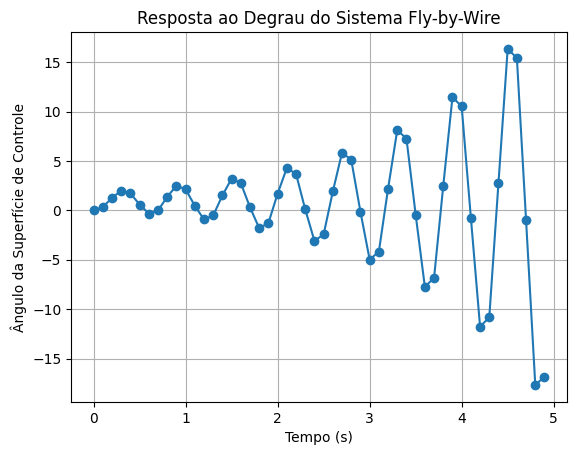

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência do processo (contínuo)
Gp = ctrl.TransferFunction([1], [1, 1, 0])

# Período de amostragem
T = 0.1

# Converter Gp para o domínio discreto usando retenção de ordem zero (ZOH)
Gp_z = ctrl.c2d(Gp, T, method='zoh')

# Modelo de retenção de ordem zero no domínio discreto
G_oh = ctrl.TransferFunction([1, -1], [1, 0], T)

# Combinação do processo e do modelo de retenção
G_combined = G_oh * Gp_z  # Agora ambos estão no domínio discreto

# Função de transferência resultante em z
Gz = G_combined

# Parâmetros do compensador digital
a = -0.9048
b = 0.25
K = 70

# Compensador digital
D_z = ctrl.TransferFunction([K, -K*a], [1, -b], T)

# Sistema compensado em malha fechada no domínio z
Gz_closed_loop = ctrl.feedback(D_z * Gz, 1)

# Criar vetor de tempo discreto compatível com T
time_discrete = np.arange(0, 5, T)

# Simulação da resposta ao degrau no domínio z
time_out, step_response = ctrl.step_response(Gz_closed_loop, time_discrete)

# Plotar a resposta ao degrau no domínio z
plt.figure()
plt.plot(time_out, step_response, marker='o', linestyle='-')
plt.title('Resposta ao Degrau do Sistema Fly-by-Wire')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo da Superfície de Controle')
plt.grid()
plt.show()